# Generation of steady state dose response heatmaps for A375 and IPC298 cell lines

This script generates steady state dose response heatmaps for combinations of RAF (belvarafenib) and MEK inhibitors (cobimetinib) for simulated both A375 (NRAS<sup>Q61</sup>) and IPC298 (BRAF<sup>V600E</sup>)

## Import of libraries
Importing libraries necessary to generate bliss heatmaps.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from synergy.combination import Bliss
import numpy as np
import os
from pathlib import Path
plt.rcParams.update({'font.size': 15})
#import synergy package 
from synergy.combination import Bliss

Changes to main file directory. This works provided the "main_dir" has the correct directory name and the cwd starts within the main file directory. This might require tweaking under some high performance computing setups.

In [2]:
main_dir = "panRAFi_MEKi_combo"
for i in Path().resolve().parents:
    if i.parts[-1] == main_dir:
        os.chdir(i)
from scripts.custom_functions.Plot_utility import generate_heatmap_pixel_map
from scripts.custom_functions.Plot_utility import signif

## Generate heatmaps

In [16]:
#Loads csv files as dataframe
IPC298_well_results_path = Path("data/Model_steady_state_dose_responses/IPC298_ Well results total pERK per well.txt")
IPC298_well_results_df = pd.read_csv(IPC298_well_results_path,delimiter='\t',header=7)

A375_well_results_path = Path("data/Model_steady_state_dose_responses/A375_Well results total pERK per well.txt")
A375_well_results_df = pd.read_csv(A375_well_results_path,delimiter='\t',header=7)

In [17]:
IPC298_well_results_mat = IPC298_well_results_df.pivot(columns='Column', index='Row',values='Nuclei - Intensity Cell Alexa 647 Mean - Mean per Well')
A375_well_results_mat = A375_well_results_df.pivot(columns='Column', index='Row',values='Nuclei - Intensity Cell Alexa 647 Mean - Mean per Well')

In [18]:
IPC298_well_results_mat

Column,1,2,3,4,5,6,7,8,9,10,11,12
Row,,,,,,,,,,,,
1,1982.408874,1937.177629,2118.538400,2134.152617,2153.420368,2133.335957,2250.621155,2133.136741,2051.350340,2291.472207,2188.966829,2250.575440
2,370.636771,362.756388,360.517712,395.179870,444.767258,556.102767,653.831768,541.086632,420.088253,371.815027,346.696687,357.579118
3,344.787257,379.487816,380.916557,460.881978,663.200295,903.086620,1306.666095,945.333610,560.701014,407.093500,357.369065,356.929366
4,357.142494,372.931903,412.872754,597.796877,1014.965907,1751.490198,2296.060016,1726.412037,939.032019,498.085478,368.725307,337.522608
5,344.936716,362.651117,469.862244,853.010045,2025.703124,2831.954770,3386.976167,2830.743537,1705.185881,667.849632,402.961052,342.472252
6,353.998216,405.202198,621.022891,1726.368770,3120.589547,4217.523617,4258.418425,3502.434954,2518.003813,1026.172373,481.086841,363.867891
7,365.344098,430.887662,609.918010,1402.727301,1969.591770,2386.968342,2146.387173,2041.745634,1658.512437,822.486011,472.048965,373.720689
8,1884.483094,2310.407218,2045.297297,2225.957186,2013.933664,2061.729600,2032.136707,2185.814812,2138.834968,1998.510794,2045.217473,1912.537263


In [19]:
A375_well_results_mat

Column,1,2,3,4,5,6,7,8,9,10,11,12
Row,,,,,,,,,,,,
1,1174.435019,1286.328328,1295.399325,1193.761934,1212.798860,1245.992598,1126.930693,1317.654776,1219.576790,1241.559697,1181.751735,1037.983101
2,311.222381,306.481213,309.936102,303.989325,351.282249,340.665794,355.884759,348.945605,327.048653,317.266486,306.645185,310.190717
3,304.547713,303.495878,322.342677,330.651053,323.023598,348.628949,412.262215,354.117048,332.455133,335.583950,306.942193,311.253219
4,303.238049,299.353895,328.720865,323.403204,357.424023,536.277917,790.882757,474.215908,335.733550,332.877808,316.686350,296.183071
5,300.038336,293.317693,311.399069,325.225354,506.924900,921.122898,1154.974869,647.251860,358.473909,325.354449,315.453011,301.662496
6,294.632388,321.775439,322.777839,341.751745,592.214803,1275.731427,1229.383110,680.055581,373.643297,336.844476,339.877131,306.496336
7,309.500596,325.121133,348.083087,351.709452,653.493678,1257.885102,1162.162664,763.001902,393.834814,335.529233,343.979487,314.139155
8,1048.875288,1186.632881,1225.025189,1271.027087,1264.897183,1328.885540,1228.874014,1242.963058,1254.007335,1183.453520,1273.043155,1037.908874


In [13]:
IPC298_well_results_df

,Row,Column,Plane,Timepoint,Nuclei - Number of Objects,Nuclei - Intensity Cell Alexa 647 Mean - Mean per Well,Number of Analyzed Fields,Height [µm],Time [s],Compound,Concentration,Cell Type,Cell Count,Unnamed: 13
0,1,1,1,0,476,1982.408874,20,0,0,NaN,NaN,NaN,NaN,NaN
1,1,2,1,0,648,1937.177629,20,0,0,NaN,NaN,NaN,NaN,NaN
2,1,3,1,0,637,2118.538400,20,0,0,NaN,NaN,NaN,NaN,NaN
3,1,4,1,0,695,2134.152617,20,0,0,NaN,NaN,NaN,NaN,NaN
4,1,5,1,0,814,2153.420368,20,0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,8,8,1,0,562,2185.814812,20,0,0,NaN,NaN,NaN,NaN,NaN
92,8,9,1,0,677,2138.834968,20,0,0,NaN,NaN,NaN,NaN,NaN
93,8,10,1,0,682,1998.510794,20,0,0,NaN,NaN,NaN,NaN,NaN
94,8,11,1,0,646,2045.217473,20,0,0,NaN,NaN,NaN,NaN,NaN


[-0.08333333 -0.08333333 -0.08333333 -0.08333333 -0.08333333 -0.08333333
 -0.08333333 -0.08333333 -0.08333333 -0.08333333 -0.08333333]


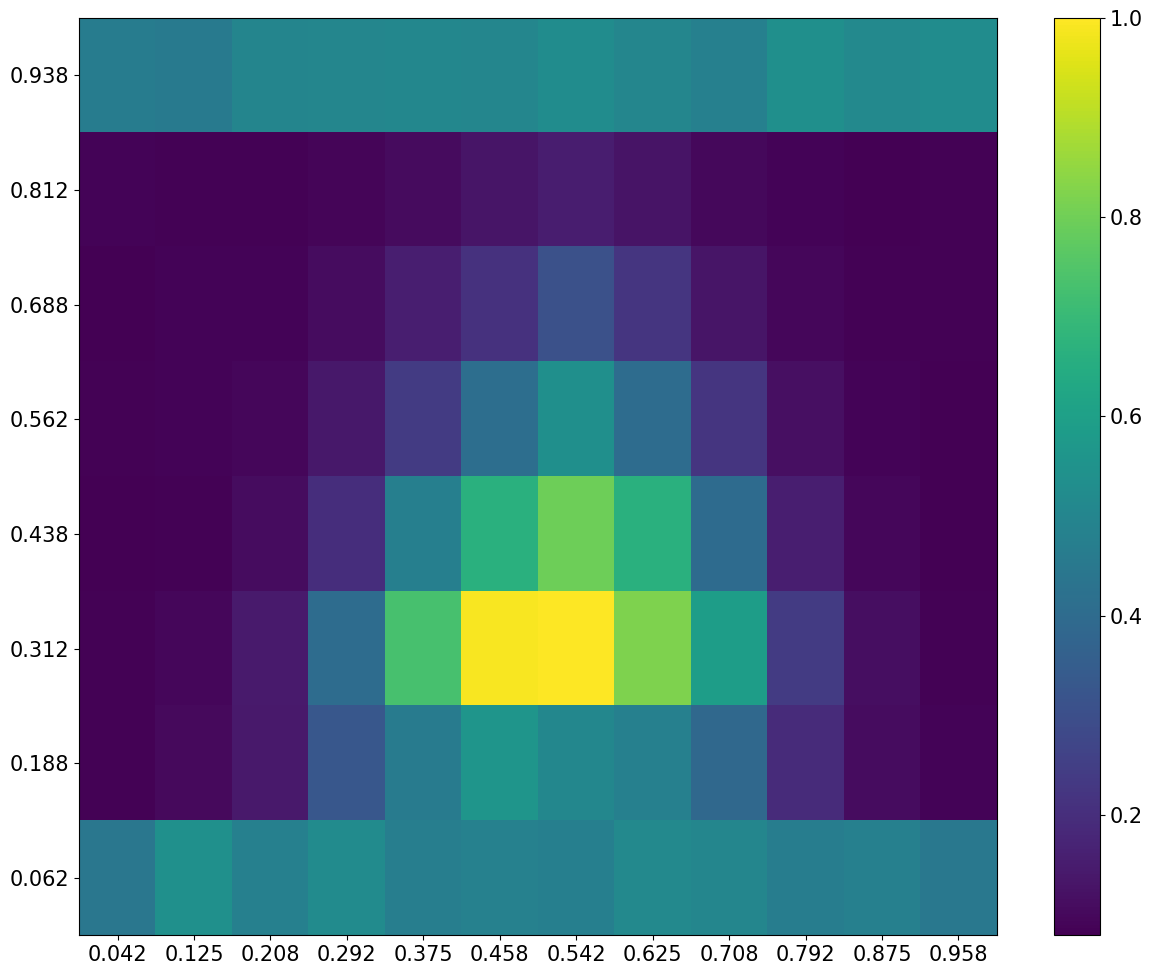

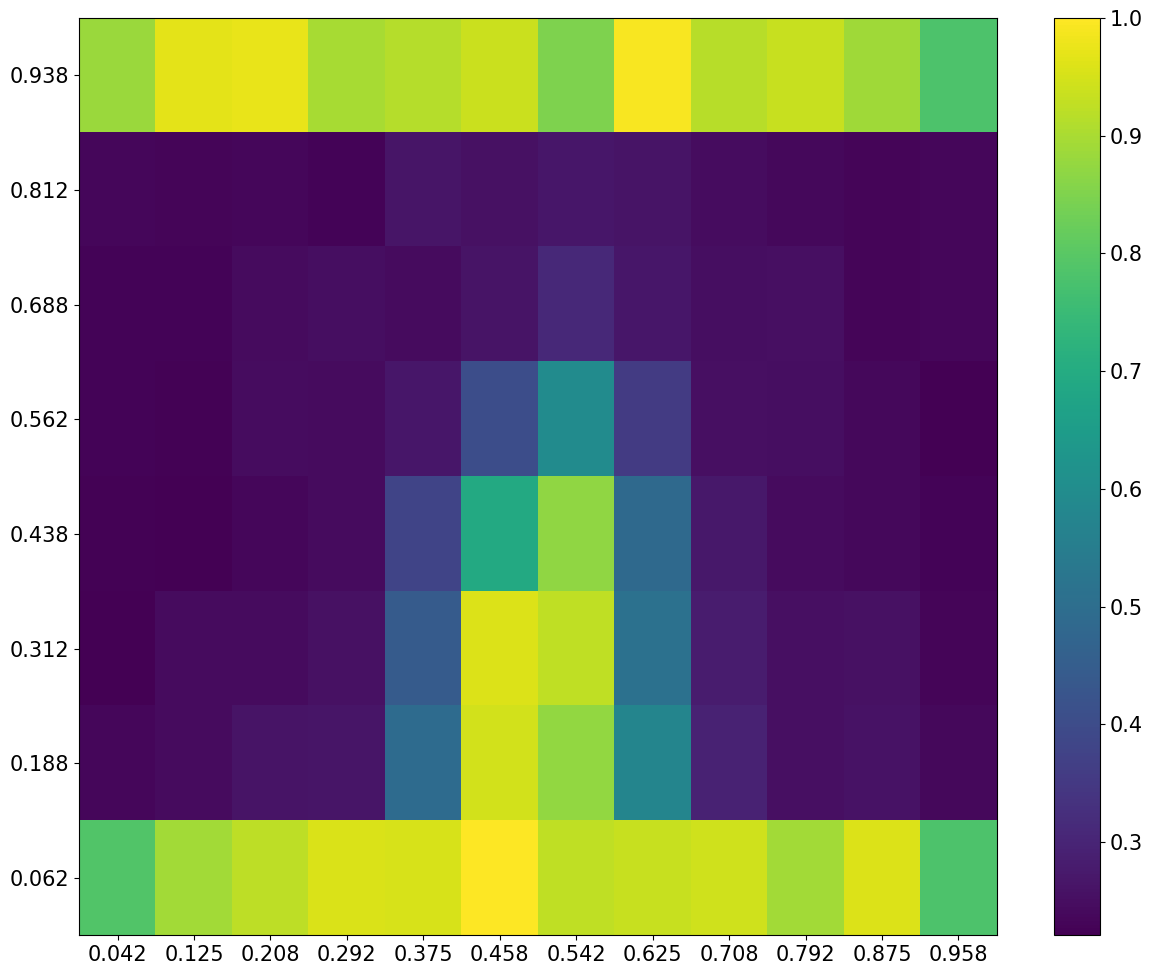

In [43]:
fig_IPC298, ax_IPC298 = plt.subplots(1, 1,figsize=(15,10))
fig_A375, ax_A375 = plt.subplots(1, 1,figsize=(15,10))
im=ax_A375.imshow(A375_well_results_mat/np.max(A375_well_results_mat), extent=[0, 1, 0, 1],vmax = 1)
fig_A375.colorbar(im, ax=ax_A375, fraction=0.046, pad=0.04)
n_col = np.shape(A375_well_results_mat.to_numpy())[1]
x_loc = np.linspace(1/n_col/2,1-1/n_col/2,n_col)


n_row = np.shape(A375_well_results_mat.to_numpy())[0]
y_loc = np.linspace(1/n_row/2,1-1/n_row/2,n_row)
ax_A375.set_xticks(ticks = x_loc,labels = np.round(x_loc,3))
print(x_loc[:-1] - x_loc[1:])
ax_A375.set_yticks(ticks = y_loc,labels = np.round(y_loc,3))
#ax_n_CRAF[i,j].title.set_text(plt_titles[j]+ f", {params[i]}")
#if (i==len(params)-1):    
#ax_A375.set_xlabel('Belvarafenib ($\mu$M)')
#if (j==0):    
#ax_A375.set_ylabel('Cobimetinib ($\mu$M)')
    
im=ax_IPC298.imshow(IPC298_well_results_mat/np.max(IPC298_well_results_mat), extent=[0, 1, 0, 1],vmax = 1)
fig_IPC298.colorbar(im, ax=ax_IPC298, fraction=0.046, pad=0.04)
ax_IPC298.set_xticks(ticks = x_loc,labels = np.round(x_loc,3))
ax_IPC298.set_yticks(ticks = y_loc,labels = np.round(y_loc,3))
#ax_w_CRAF[i,j].title.set_text(plt_titles[j]+ f", {params[i]}")
#if (i==len(params)-1):    
#ax_IPC298.set_xlabel('Belvarafenib ($\mu$M)')
#if (j==0):    
#ax_IPC298.set_ylabel('Cobimetinib ($\mu$M)')
fig_A375.subplots_adjust(wspace=0, hspace=0)
fig_A375.tight_layout()
fig_A375.savefig(Path(f"figures/Experimental_dose_response/Belva_Cobi_A375.svg"),format='svg')
fig_IPC298.subplots_adjust(wspace=0, hspace=0)
fig_IPC298.tight_layout()
fig_IPC298.savefig(Path(f"figures/Experimental_dose_response/Belva_Cobi_fig_IPC298.svg"),format='svg')

NameError: name 'dr_df_IPC298' is not defined

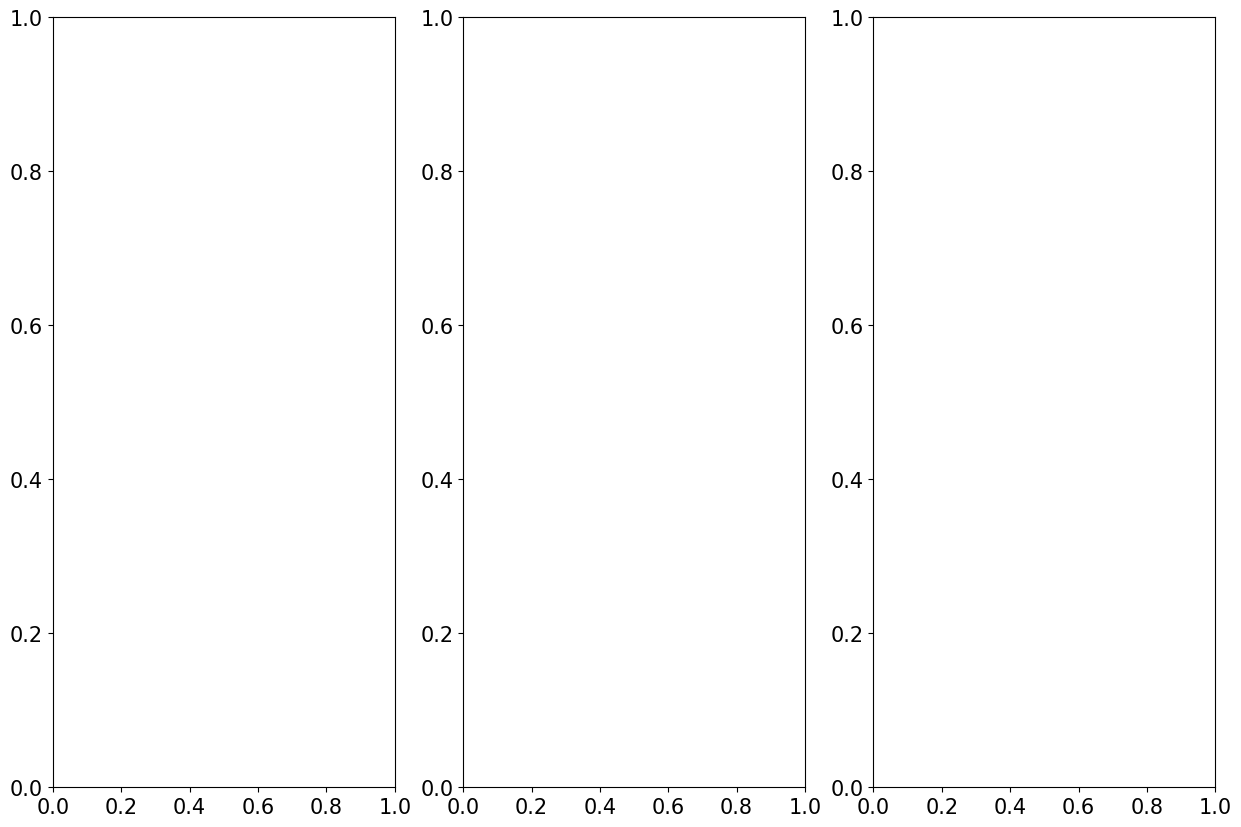

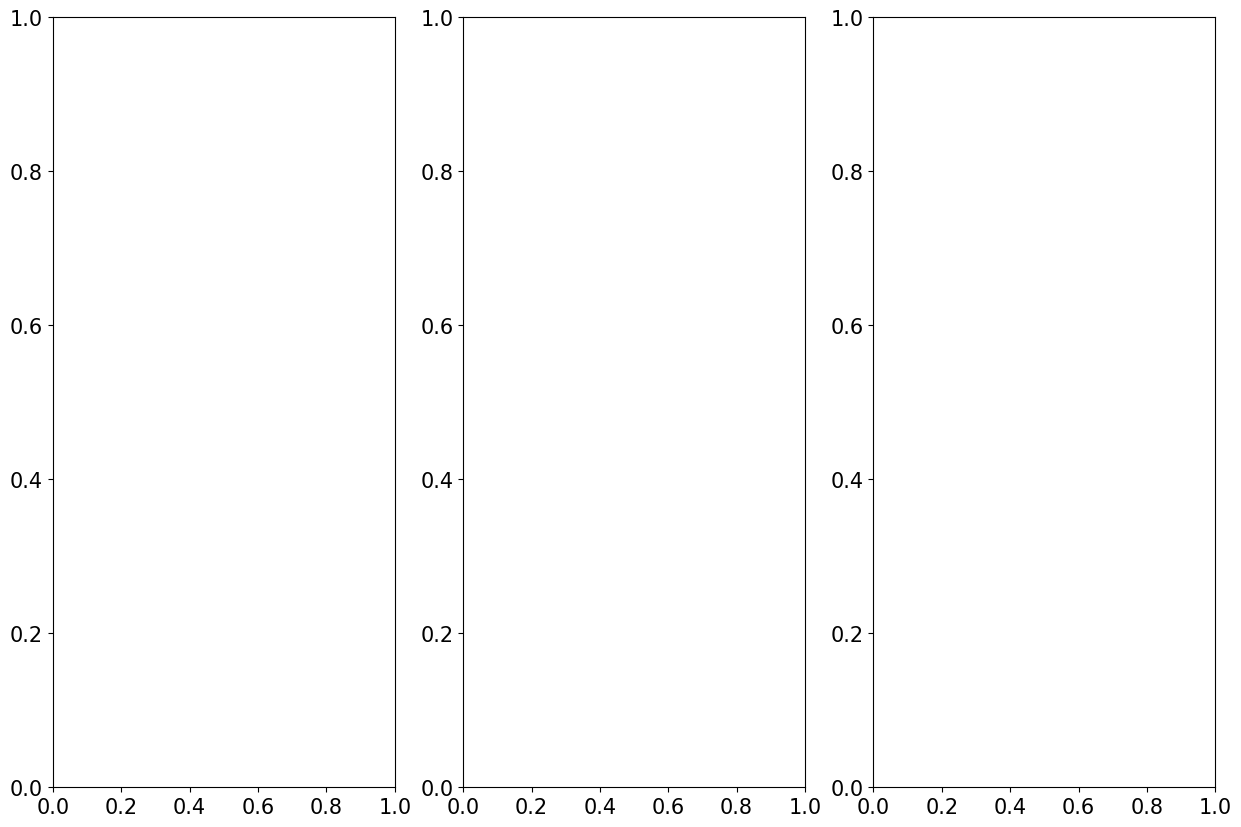

In [23]:
# extract drugless condition
zero_dose_IPC298_df = IPC298_well_results_df.iloc[0]
zero_dose_A375_df = A375_well_results_df.iloc[0]

#compare synergies among set of cooperative parameters
fig_IPC298, ax_IPC298 = plt.subplots(1, 3,figsize=(15,10))
fig_A375, ax_A375 = plt.subplots(1, 3,figsize=(15,10))
plt_titles=['Model simulations', 'Bliss null model',  'Bliss excess'];


#print(params[i])
#create and fit the Bliss models
bliss_IPC298 = Bliss()
bliss_A375 = Bliss()
D1_IPC298=IPC298_well_results_df["Column"].to_numpy();
D2_IPC298=IPC298_well_results_df["Row"].to_numpy(); 

#w = A375
D1_A375=A375_well_results_df["Column"].to_numpy();
D2_A375=A375_well_results_df["Row"].to_numpy(); 

bliss_IPC298.fit(D1_IPC298,D2_IPC298, IPC298_well_results_df[]/zero_dose_IPC298_df[params[i]]);
bliss_A375.fit(D1_A375,D2_A375, A375_well_results_df[/zero_dose_A375_df[params[i]]);

In [ ]:
#reshape E_sim to matrix
dr_df_mat_n_CRAF = dr_df_n_CRAF.set_index(["RAFi_0_uM","MEKi_0_uM"])
matrix_n_CRAF = dr_df_mat_n_CRAF[[params[i]]].pivot_table(index = "RAFi_0_uM",columns = "MEKi_0_uM",values = params[i]).to_numpy()
matrix_n_CRAF = matrix_n_CRAF/zero_dose_n_CRAF_df[params[i]]

dr_df_mat_w_CRAF = dr_df_w_CRAF.set_index(["RAFi_0_uM","MEKi_0_uM"])
matrix_w_CRAF = dr_df_mat_w_CRAF[[params[i]]].pivot_table(index = "RAFi_0_uM",columns = "MEKi_0_uM",values = params[i]).to_numpy()
matrix_w_CRAF = matrix_w_CRAF/zero_dose_w_CRAF_df[params[i]]

#extract bliss reference and bliss excess
E_mat_bliss_ref_n_CRAF=np.rot90(bliss_n_CRAF.reference.reshape(np.shape(matrix_n_CRAF)));
E_mat_bliss_syn_n_CRAF=np.rot90(bliss_n_CRAF.synergy.reshape(np.shape(matrix_n_CRAF)));
matrix_n_CRAF = np.rot90(matrix_n_CRAF)

E_mat_bliss_ref_w_CRAF=np.rot90(bliss_w_CRAF.reference.reshape(np.shape(matrix_w_CRAF)));
E_mat_bliss_syn_w_CRAF=np.rot90(bliss_w_CRAF.synergy.reshape(np.shape(matrix_w_CRAF)));
matrix_w_CRAF = np.rot90(matrix_w_CRAF)


max_simulation = np.max(np.concatenate((matrix_n_CRAF,matrix_w_CRAF)))
max_excess = np.max(np.concatenate((E_mat_bliss_ref_n_CRAF,E_mat_bliss_ref_w_CRAF)))
max_syn = np.max(np.concatenate((E_mat_bliss_syn_w_CRAF,E_mat_bliss_syn_w_CRAF)))
condition_max = [max_simulation,max_excess,max_syn]

Es_n_CRAF=[matrix_n_CRAF, E_mat_bliss_ref_n_CRAF, E_mat_bliss_syn_n_CRAF];
Es_w_CRAF=[matrix_w_CRAF, E_mat_bliss_ref_w_CRAF, E_mat_bliss_syn_w_CRAF];

xvals = np.log10(np.sort(np.unique(np.array(dr_df_mat_w_CRAF.index.get_level_values('RAFi_0_uM').tolist()))))
x_transform = generate_heatmap_pixel_map(xvals)
log_x_vals_to_mark = np.linspace(-2.25,0.5, 5);
x_loc = x_transform[0]*log_x_vals_to_mark+x_transform[1]
x_labels = signif(10**log_x_vals_to_mark,1)
yvals = np.log10(np.sort(np.unique(np.array(dr_df_mat_w_CRAF.index.get_level_values('MEKi_0_uM').tolist()))))
y_transform = generate_heatmap_pixel_map(yvals)
log_y_vals_to_mark = np.linspace(-2.75,0, 5);
y_loc = y_transform[0]*log_y_vals_to_mark+y_transform[1]
y_labels = signif(10**log_y_vals_to_mark,1)

for j in range(len(plt_titles)):
    im=ax_n_CRAF[i,j].imshow(Es_n_CRAF[j], extent=[0, 1, 0, 1],vmax = condition_max[j])
    fig_n_CRAF.colorbar(im, ax=ax_n_CRAF[i,j], fraction=0.046, pad=0.04)
    ax_n_CRAF[i,j].set_xticks(ticks = x_loc,labels = x_labels)
    ax_n_CRAF[i,j].set_yticks(ticks = y_loc, labels = y_labels)
    ax_n_CRAF[i,j].title.set_text(plt_titles[j]+ f", {params[i]}")
    if (i==len(params)-1):    
        ax_n_CRAF[i,j].set_xlabel('Belvarafenib ($\mu$M)')
    if (j==0):    
        ax_n_CRAF[i,j].set_ylabel('Cobimetinib ($\mu$M)')
        
    im=ax_w_CRAF[i,j].imshow(Es_w_CRAF[j], extent=[0, 1, 0, 1],vmax = condition_max[j])
    fig_w_CRAF.colorbar(im, ax=ax_w_CRAF[i,j], fraction=0.046, pad=0.04)
    ax_w_CRAF[i,j].set_xticks(ticks = x_loc,labels = x_labels)
    ax_w_CRAF[i,j].set_yticks(ticks = y_loc, labels = y_labels)
    ax_w_CRAF[i,j].title.set_text(plt_titles[j]+ f", {params[i]}")
    if (i==len(params)-1):    
        ax_w_CRAF[i,j].set_xlabel('Belvarafenib ($\mu$M)')
    if (j==0):    
        ax_w_CRAF[i,j].set_ylabel('Cobimetinib ($\mu$M)')
fig_n_CRAF.subplots_adjust(wspace=0, hspace=0)
fig_n_CRAF.tight_layout()
#fig_n_CRAF.savefig(Path(f"figures/Model_predicted_synergy/Scaled_Belva_Cobi_SS_NRAS_Q61_no_CRAF_feedback.svg"),format='svg')
fig_w_CRAF.subplots_adjust(wspace=0, hspace=0)
fig_w_CRAF.tight_layout()
#fig_w_CRAF.savefig(Path(f"figures/Model_predicted_synergy/Scaled_Belva_Cobi_SS_NRAS_Q61_w_CRAF_feedback.svg"),format='svg')